## Poisson equation using fenics (practice example)

In [51]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
%matplotlib inline

### Define the domain

In [52]:
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 12)
mesh

### Choose the trial and test function space

In [53]:
V = FunctionSpace(mesh, 'P', 1)
u = TrialFunction(V)
v = TestFunction(V)

### Manufacture a simple example
$u(x, y) = x^2 + y^2$, which, with the Poisson equation, results from $f(x, y) = -4$.

In [54]:
u_D = Expression('x[0]*x[0] + x[1]*x[1]', degree=2)
f = -4
bc = DirichletBC(V, u_D, 'on_boundary')

### Define the variational problem

In [55]:
dx = Measure('dx', domain=mesh)

a = dot(grad(u), grad(v))*dx
L = f*v*dx

### Solve the variational problem

In [56]:
u = Function(V)
solve(a == L, u, bc)

### Visualize and quantify the fit of the solution

0.009497625170447315

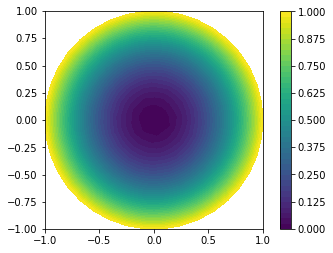

In [57]:
plt.colorbar(plot(u))
errornorm(u_D, u, 'l2')